## Feature Scaling

1. Standardization
2. Normalization-Min Max Scaler
3. Unit Vector

In [3]:
# Load Dataset
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
# Calculate Z score (xi-mean)/std
import numpy as np

mean = np.mean(df['total_bill'])
std = np.std(df['total_bill'])

standarize_data = []

for x in df['total_bill']:
    z_score = (x-mean)/std
    standarize_data.append(z_score)

In [16]:
standarize_data

[-0.3147113050904943,
 -1.0632353132988692,
 0.13777989987156145,
 0.43831510316725475,
 0.540744704290506,
 0.6195367051545455,
 -1.2399545152367863,
 0.7985071071171495,
 -0.5342033074974614,
 -0.5634689078183903,
 -1.0711145133852733,
 1.7417599174609364,
 -0.49143050702841123,
 -0.15262490331304146,
 -0.557840907756673,
 0.2019391005751361,
 -1.0643609133112126,
 -0.3935033059545337,
 -0.31696250511518104,
 0.09725829942719795,
 -0.2100305039425557,
 0.05673669898283484,
 -0.45203450659639155,
 2.2100095225958003,
 0.003833498402694168,
 -0.2224121040783337,
 -0.7221785095588127,
 -0.7987193103981653,
 0.21544630072325727,
 -0.015301701807144186,
 -1.1521577142739994,
 -0.16162970341178864,
 -0.5319521074727743,
 0.10176069947657193,
 -0.22578890411536368,
 0.4810879036363046,
 -0.3912521059298469,
 -0.32146490516455467,
 -0.12335930299211233,
 1.2926455125359115,
 -0.4216433062631192,
 -0.2618081045103532,
 -0.6580193088552376,
 -1.137524914113535,
 1.1947183114620337,
 -0.1683833

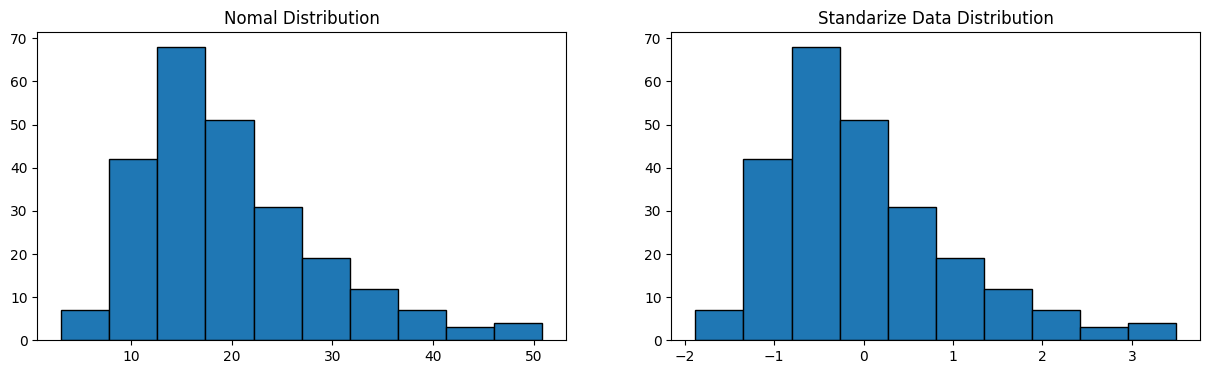

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(df['total_bill'], edgecolor = "black")
plt.title("Nomal Distribution")

plt.subplot(1,2,2)
plt.hist(standarize_data, edgecolor = "black")
plt.title("Standarize Data Distribution")
plt.show()

In [40]:
# Standrization using Sklearn libraries

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['total_bill']]) # Calculate mean and std of the dataset
scaler.transform(df[['total_bill']]) # To standarize the dataset

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [46]:
# Or we can use fit and transform together, same thing will be happen
std_total_bill = scaler.fit_transform(df[['total_bill']])

# We can also convert it into DataFrame
import pandas as pd
pd.DataFrame(std_total_bill, columns=["total_bill"])

,total_bill
0,-0.314711
1,-1.063235
2,0.137780
3,0.438315
4,0.540745
...,...
239,1.040511
240,0.832275
241,0.324630
242,-0.221287


In [47]:
# We can also implent Standarization for Multiple column at a time

pd.DataFrame(scaler.fit_transform(df[["total_bill", "tip"]]), columns=["total_bill", "tip"])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [49]:
# Now we can use this for new data
scaler.transform([[13,4]])

/home/utpal/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.76382571,  0.72546447]])

## Normalization - Min Max Scaler

In [51]:
# Load dataset 
df = sns.load_dataset("taxis")
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [58]:
# Using Sklearn MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['distance', 'fare', 'tip']])
scaler.transform(df[['distance', 'fare', 'tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [61]:
# Convert into DataFrame
pd.DataFrame(scaler.fit_transform(df[['distance', 'fare', 'tip']]), columns=['distance', 'fare', 'tip'])

,distance,fare,tip
0,0.043597,0.040268,0.064759
1,0.021526,0.026846,0.000000
2,0.037330,0.043624,0.071084
3,0.209809,0.174497,0.185241
4,0.058856,0.053691,0.033133
...,...,...,...
6428,0.020436,0.023490,0.031928
6429,0.510627,0.382550,0.000000
6430,0.112807,0.100671,0.000000
6431,0.030518,0.033557,0.000000


In [64]:
# For new data 
scaler.transform([[2,5,10]])

/home/utpal/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.05449591, 0.02684564, 0.30120482]])

## Unit Vector

In [65]:
from sklearn.preprocessing import normalize

In [66]:
normalize(df[['distance', 'fare', 'tip']])

array([[0.21346145, 0.93389384, 0.28683882],
       [0.15606402, 0.98774694, 0.        ],
       [0.1716575 , 0.93973084, 0.29570197],
       ...,
       [0.25050016, 0.96811656, 0.        ],
       [0.18349711, 0.98302025, 0.        ],
       [0.2429556 , 0.94658025, 0.21203398]])

In [69]:
pd.DataFrame(normalize(df[['distance', 'fare', 'tip']]), columns=['distance', 'fare', 'tip'])

,distance,fare,tip
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
...,...,...,...
6428,0.160133,0.960800,0.226322
6429,0.307453,0.951563,0.000000
6430,0.250500,0.968117,0.000000
6431,0.183497,0.983020,0.000000
